# Plotting Effects of Different Alphas on FDE

## Import Statements

In [1]:
from caputo import caputo_euler
import numpy as np
import matplotlib.pyplot as plt
import random

## Plotting

In [2]:
def generate_true_data():
    # ranges determined by table 1 and 3
    alpha_min, alpha_max = 0.9, 1.0
    beta_min, beta_max = 0.1, 0.4
    sigma_min, sigma_max = 0.077, 0.3
    gamma_min, gamma_max = 0.036, 0.1
    mu_min, mu_max = 0.001, 0.03

    alpha_true = random.uniform(alpha_min, alpha_max)
    beta_true = random.uniform(beta_min, beta_max)
    sigma_true = random.uniform(sigma_min, sigma_max)
    gamma_true = random.uniform(gamma_min, gamma_max)
    mu_true = random.uniform(mu_min, mu_max)
    return alpha_true, beta_true, sigma_true, gamma_true, mu_true

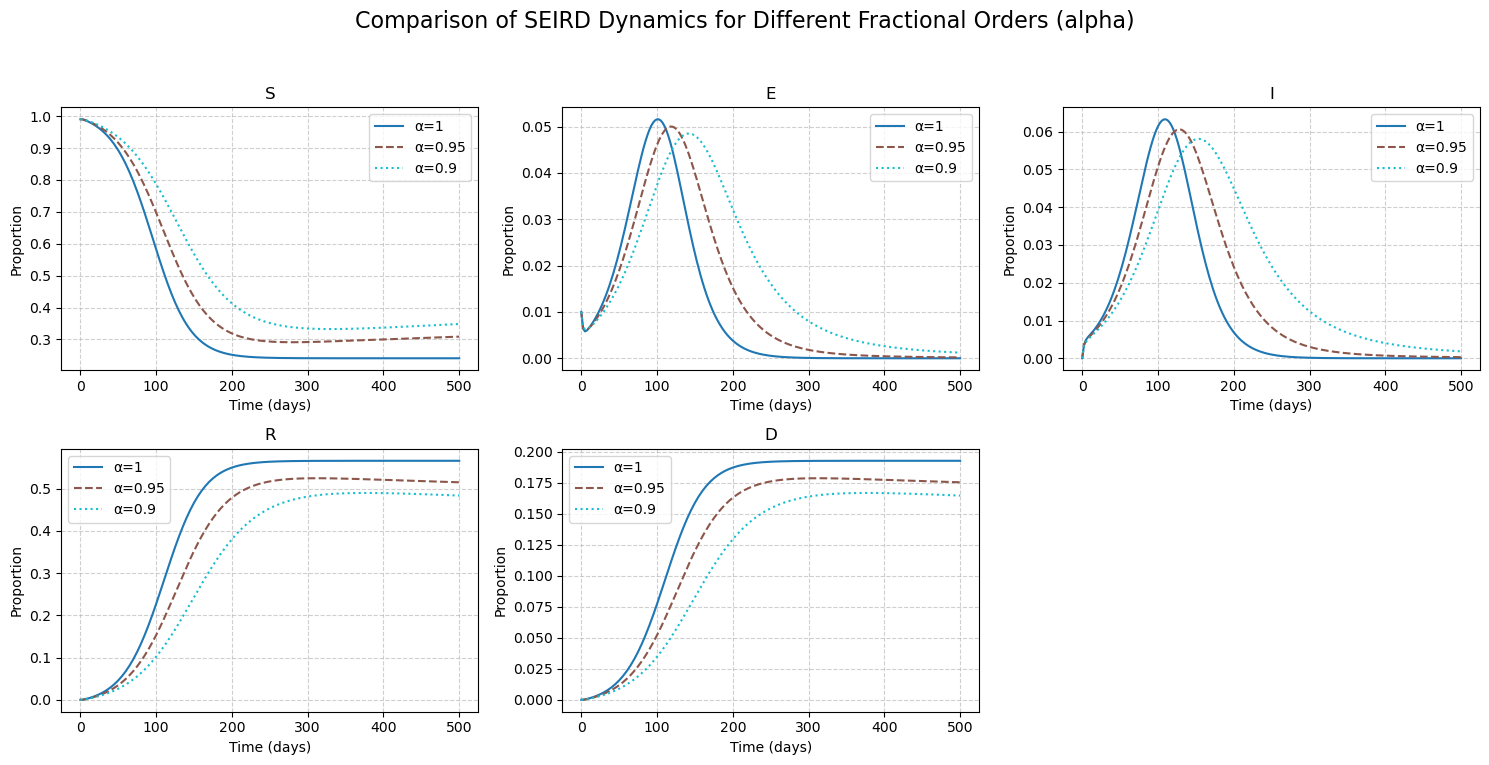

In [3]:
_, beta_true, sigma_true, gamma_true, mu_true = generate_true_data()
alphas = [1,.95,.9]
y0 = np.array([0.99, 0.01, 0, 0, 0]) # Initial state: 1% exposed
t0 = 0
tf = 500 # 500 days
num_step = 200 # Good ground truth from tests
f = lambda t, y: np.array([
    - beta_true * (y[0] * y[2]) / (1 - y[4]),
    beta_true * (y[0] * y[2]) / (1 - y[4]) - sigma_true * y[1],
    sigma_true * y[1] - (gamma_true + mu_true) * y[2],
    gamma_true * y[2],
    mu_true * y[2]
])
fig, axs = plt.subplots(2, 3, figsize=(15, 8)) 
axs = axs.ravel() 
labels = ['S', 'E', 'I', 'R', 'D']
colors = plt.cm.tab10(np.linspace(0, 1, len(alphas)))
linestyles = ['-', '--', ':'] 

for idx, alpha_val in enumerate(alphas):
    ts, ys = caputo_euler(f, alpha_val, (t0, tf), num_step, y0)

    for i in range(5):
        axs[i].plot(ts, ys[:, i],
                    label=f'α={alpha_val}',
                    color=colors[idx],
                    linestyle=linestyles[idx])

for i in range(5):
    axs[i].set_title(labels[i])
    axs[i].set_xlabel('Time (days)')
    axs[i].set_ylabel('Proportion')
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.6)

# Hide the unused 6th subplot
axs[5].axis('off')

fig.suptitle('Comparison of SEIRD Dynamics for Different Fractional Orders (alpha)', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.savefig('doc/images/alpha_effect.png')